# Week 3 Day 1 Assignment

## Dataset 1: Housing Dataset (Supervised Regression)
- Source: Kaggle — *House Prices: Advanced Regression Techniques*
- Goal: Predict house prices (regression)

## Dataset 2: Customer Segmentation (Unsupervised Clustering)
- Source: Kaggle — *Mall Customer Segmentation Data*
- Goal: Cluster customers based on purchase behavior

In [7]:
# If needed (run once):
# %pip install kagglehub pandas numpy scikit-learn matplotlib seaborn

import os
import glob
import pandas as pd
import numpy as np
from IPython.display import display

In [12]:
# --- Download and load Housing dataset (Kaggle) ---
# Kaggle dataset handle (dataset, not competition)
# You must have Kaggle API credentials set up for this to work.

import kagglehub

HOUSING_HANDLE = "yasserh/housing-prices-dataset"

try:
    housing_path = kagglehub.dataset_download(HOUSING_HANDLE)
    # find CSV in the bundle
    csv_files = glob.glob(os.path.join(housing_path, "**", "*.csv"), recursive=True)
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the housing dataset.")

    housing_csv = csv_files[0]
    housing_df = pd.read_csv(housing_csv)
    print("Housing dataset loaded:", housing_df.shape)
    display(housing_df.head())
except Exception as e:
    print("Housing dataset download/load failed.")
    print("Make sure Kaggle API credentials are configured.")
    print("Error:", e)

Housing dataset loaded: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
# Quick baseline regression (optional example)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

if 'housing_df' in globals():
    # Try to detect a target column for price
    target_candidates = ["SalePrice", "price", "Price", "MEDV"]
    target_col = next((c for c in target_candidates if c in housing_df.columns), None)

    if target_col is None:
        raise ValueError("Could not find a price column. Please set target_col manually.")

    # Use only numeric features for a simple baseline
    X = housing_df.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
    y = housing_df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print("Target column:", target_col)
    print("MAE:", mean_absolute_error(y_test, preds))

Target column: price
MAE: 1127483.3523235186


In [14]:
# --- Download and load Customer Segmentation dataset (Kaggle) ---
SEGMENT_HANDLE = "vjchoudhary7/customer-segmentation-tutorial-in-python"

try:
    segment_path = kagglehub.dataset_download(SEGMENT_HANDLE)
    # find CSV in the bundle
    csv_files = glob.glob(os.path.join(segment_path, "**", "*.csv"), recursive=True)
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the segmentation dataset.")

    segment_csv = csv_files[0]
    segment_df = pd.read_csv(segment_csv)
    print("Segmentation dataset loaded:", segment_df.shape)
    display(segment_df.head())
except Exception as e:
    print("Segmentation dataset download/load failed.")
    print("Make sure Kaggle API credentials are configured.")
    print("Error:", e)

Segmentation dataset loaded: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Simple clustering example (KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

if 'segment_df' in globals():
    # Select numeric columns for clustering
    seg_num = segment_df.select_dtypes(include='number').dropna()
    scaler = StandardScaler()
    seg_scaled = scaler.fit_transform(seg_num)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
    segment_df['cluster'] = kmeans.fit_predict(seg_scaled)

    print(segment_df['cluster'].value_counts())

cluster
1    87
0    63
2    50
Name: count, dtype: int64


k=2 | inertia=715.79 | silhouette=0.288 | DBI=1.507
k=3 | inertia=375.38 | silhouette=0.454 | DBI=0.900
k=4 | inertia=270.75 | silhouette=0.476 | DBI=0.833
k=5 | inertia=228.68 | silhouette=0.443 | DBI=0.849
k=6 | inertia=192.71 | silhouette=0.423 | DBI=0.872
k=7 | inertia=162.73 | silhouette=0.425 | DBI=0.896
k=8 | inertia=146.91 | silhouette=0.412 | DBI=0.913


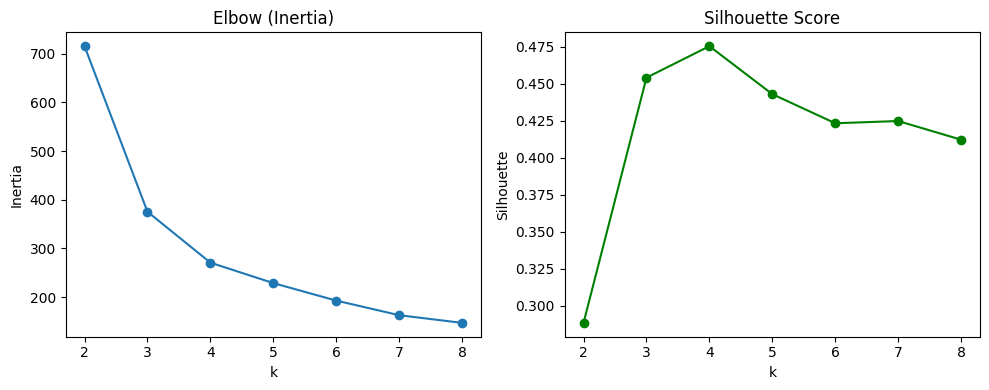

In [16]:
# Evaluate clustering quality (Elbow + Silhouette + Davies-Bouldin)
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

if 'segment_df' in globals():
    seg_num = segment_df.select_dtypes(include='number').dropna()
    scaler = StandardScaler()
    seg_scaled = scaler.fit_transform(seg_num)

    ks = range(2, 9)
    inertias = []
    silhouettes = []
    db_scores = []

    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = km.fit_predict(seg_scaled)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(seg_scaled, labels))
        db_scores.append(davies_bouldin_score(seg_scaled, labels))

    # Print numeric summary
    for k, inertia, sil, db in zip(ks, inertias, silhouettes, db_scores):
        print(f"k={k} | inertia={inertia:.2f} | silhouette={sil:.3f} | DBI={db:.3f}")

    # Plot elbow and silhouette
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(list(ks), inertias, marker='o')
    ax[0].set_title('Elbow (Inertia)')
    ax[0].set_xlabel('k')
    ax[0].set_ylabel('Inertia')

    ax[1].plot(list(ks), silhouettes, marker='o', color='green')
    ax[1].set_title('Silhouette Score')
    ax[1].set_xlabel('k')
    ax[1].set_ylabel('Silhouette')

    plt.tight_layout()
    plt.show()